In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\Machine Learning A-Z\\Part 4 - Clustering\\Section 24 - K-Means Clustering\\Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = data.iloc[:, [2,4]].values

In [15]:
X = data.iloc[:, [3,4]].values

In [4]:
from sklearn.cluster import KMeans
import time

In [14]:
def elbow_method(data, n_init = 10, clusters = 11):
    wcss =[]
    for i in range(1,clusters):
        kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = n_init , random_state = 0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return plt.plot(range(1,11),wcss)

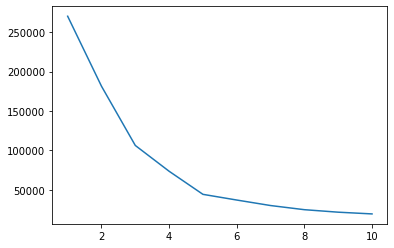

In [15]:
start1 = time.time()
elbow_method(X)
end1 = time.time()

In [16]:
end1-start1

2.1270389556884766

# JIT

In [8]:
from numba import jit

In [17]:
@jit
def elbow_method(data, n_init = 10, clusters = 11):
    wcss =[]
    for i in range(1,clusters):
        kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = n_init , random_state = 0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return plt.plot(range(1,11),wcss)

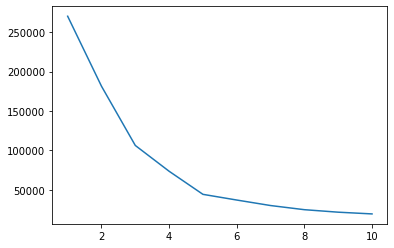

In [18]:
start2 = time.time()
elbow_method(X)
from warnings import filterwarnings
filterwarnings("ignore")

end2 = time.time()

In [19]:
end2-start2

3.075590133666992

# CUDA

In [20]:
from numba import jit, cuda, uint32, f8, vectorize, uint8

In [23]:
mandel_gpu = cuda.jit(restype = uint32, argtypes = [f8, f8, uint32], device = True)(elbow_method)

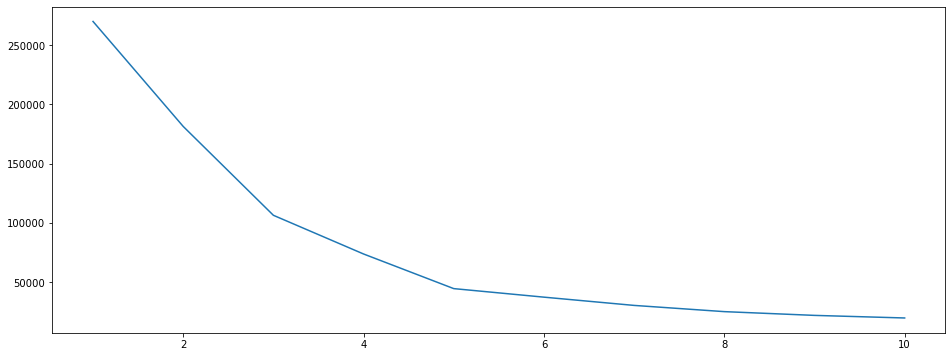

In [16]:
#Elbow Method
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize = (16,6))
plt.plot(range(1,11),wcss)

In [17]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [19]:
data['ClusterNumber'] = y_kmeans
clusters = {4: 'Sensible',
           3: 'Careless',
           2: 'Target',
           1: 'Standard',
           0: 'Careful'}

data['ClusterName'] = data['ClusterNumber'].map(clusters)

<IPython.core.display.Javascript object>


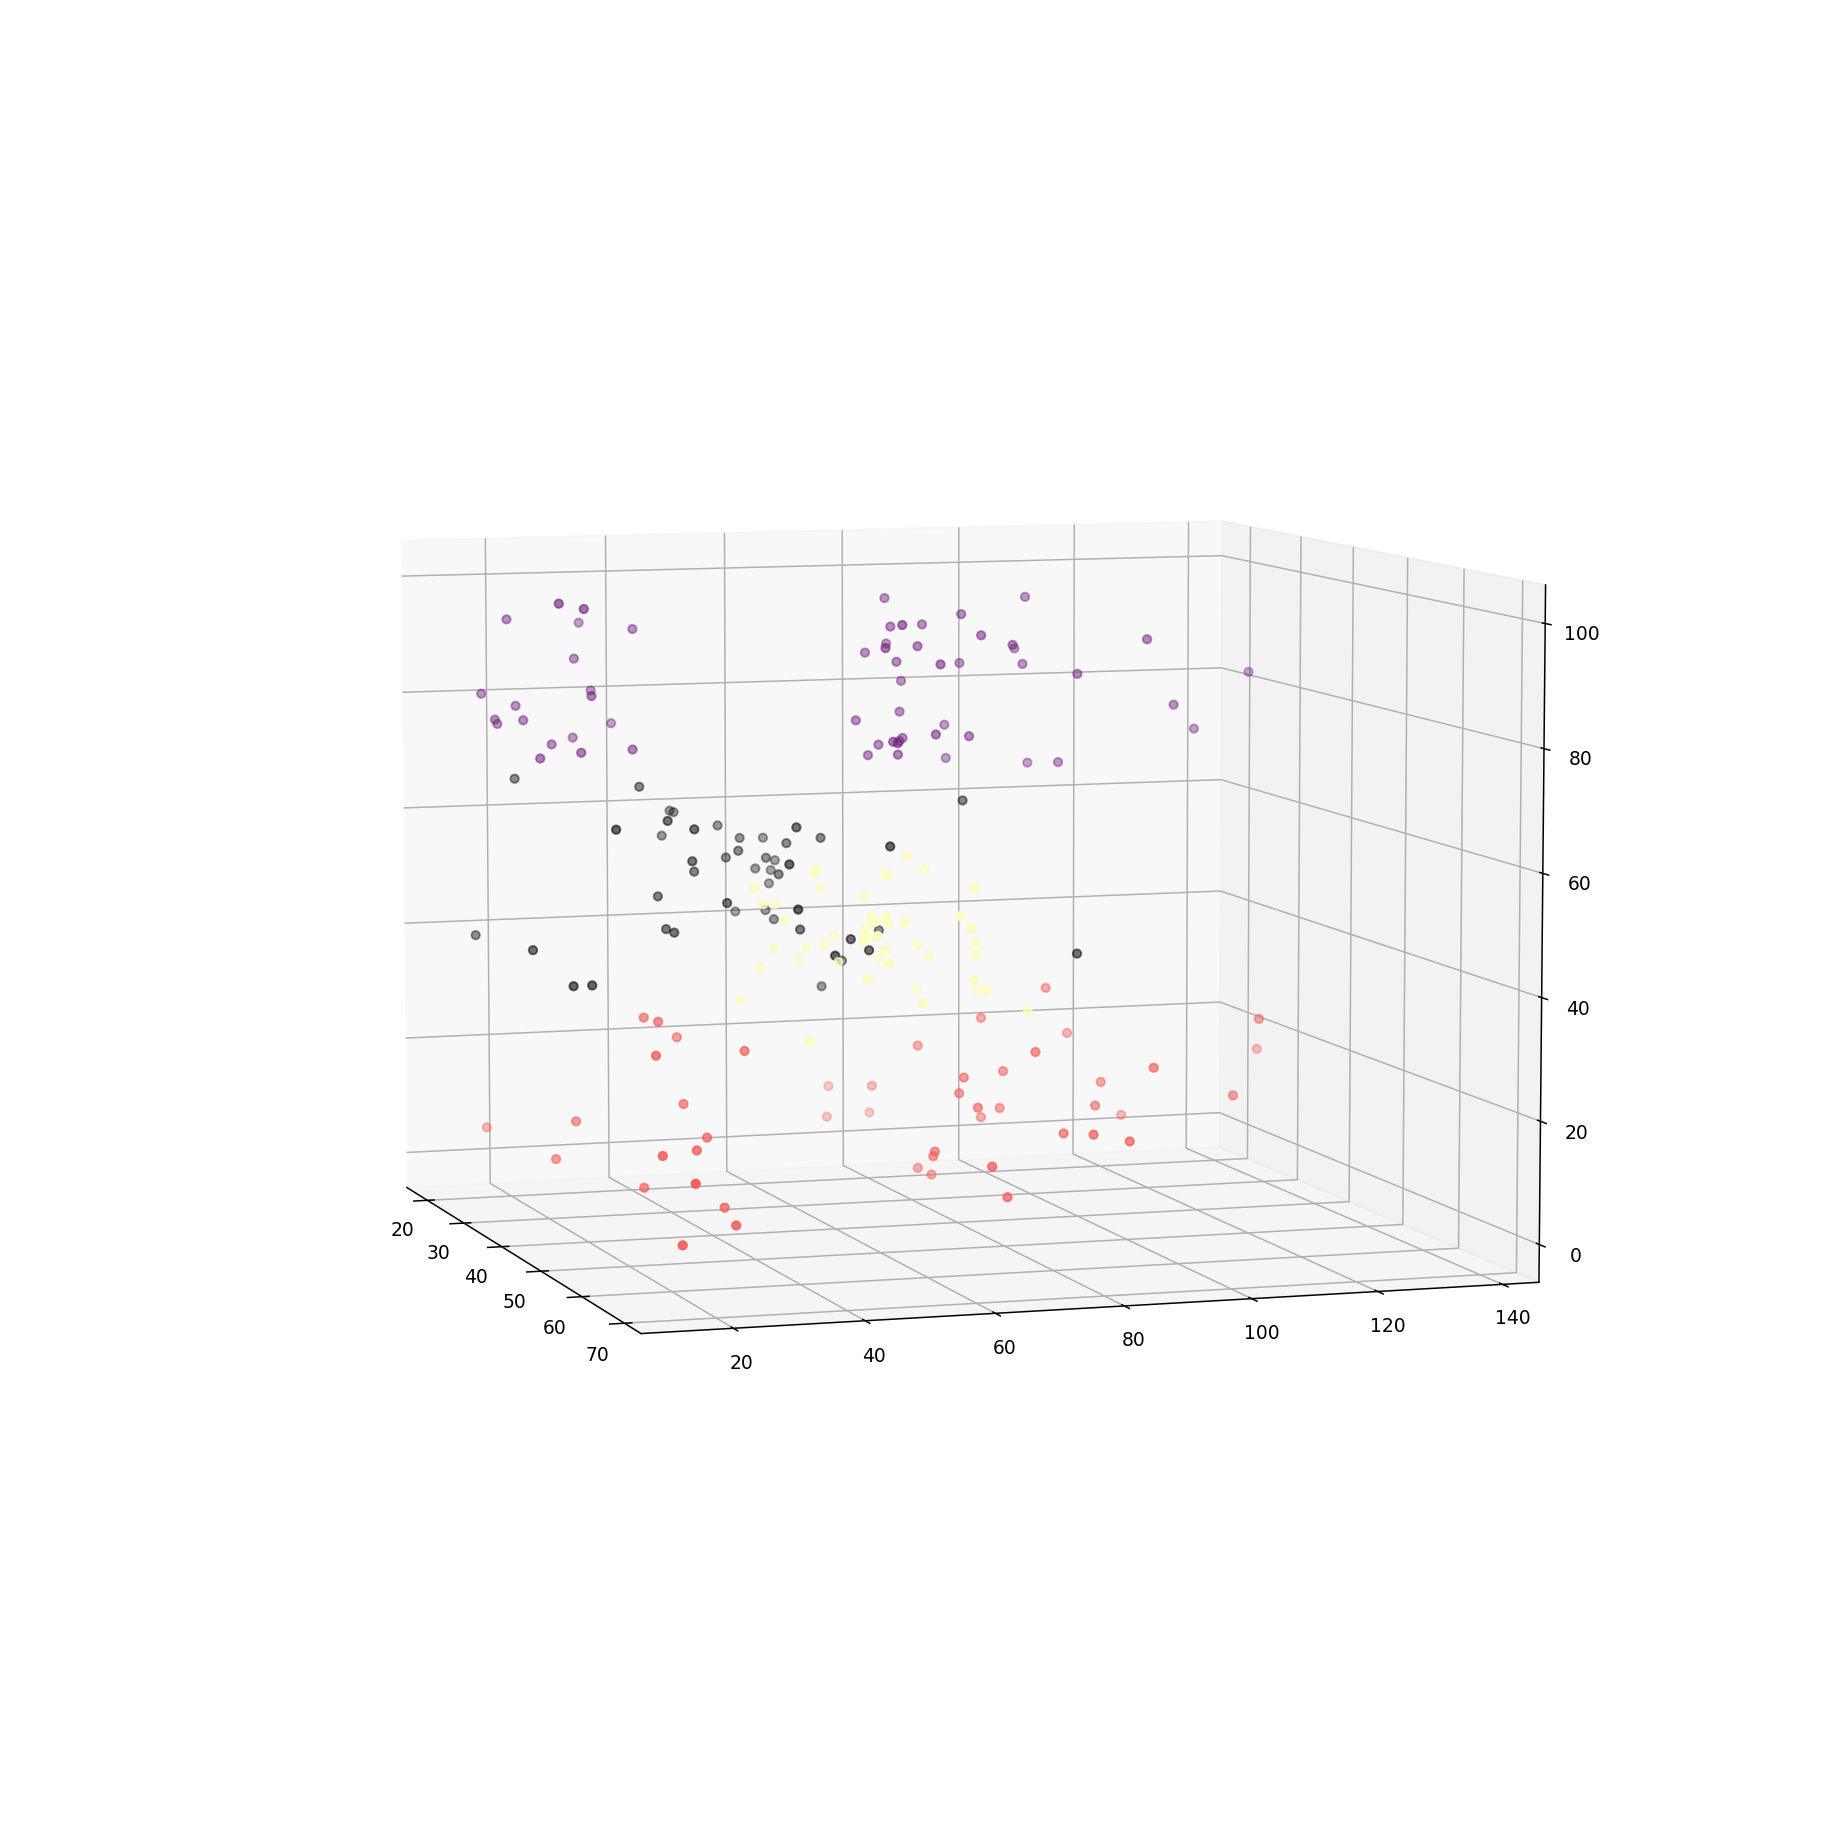

In [12]:
from mpl_toolkits import mplot3d
%matplotlib notebook
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c= data['ClusterNumber'],
             cmap = 'magma')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

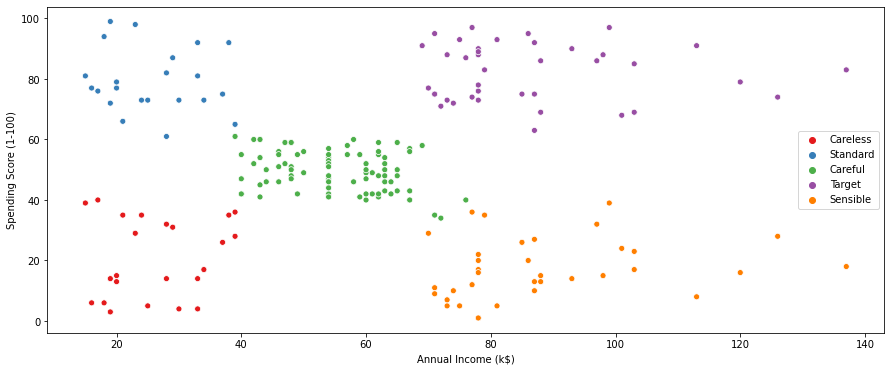

In [22]:
%matplotlib inline

clusterName = np.array(data['ClusterName'])
plt.figure(figsize=(15,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data = data, hue =clusterName, palette='Set1')

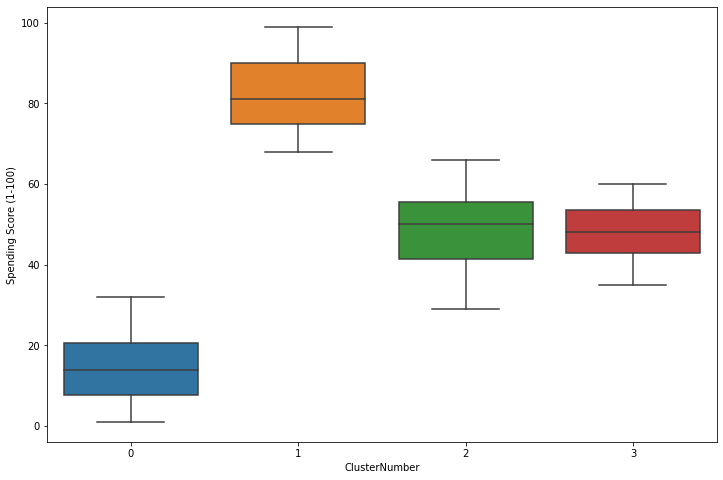

In [29]:
from seaborn import boxplot
%matplotlib inline
plt.figure(figsize=(12,8))
boxplot(x='ClusterNumber', y='Spending Score (1-100)', data = data)

Text(0, 0.5, 'Spending Score')

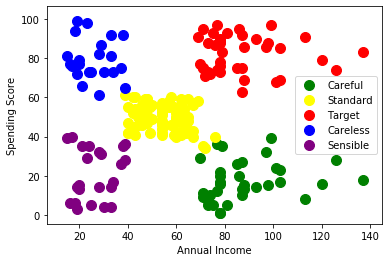

In [38]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'green', label = 'Careful')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'yellow', label = 'Standard')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'red', label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'blue', label = 'Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'purple', label = 'Sensible')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Elbow Method

def 
wcss =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize = (16,6))
plt.plot(range(1,11),wcss)
